In [50]:
from datetime import date
from matplotlib import pyplot as plt
from mhw_updated import MarineHeatWaveCalculator, generate_random_t_temp

In [51]:
def plot_trend(t, temp):
    dates = [date.fromordinal(tt.astype(int)) for tt in t]
    plt.figure(figsize=(10, 5))
    plt.plot(dates, temp, label='Synthetic Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Synthetic Sea Surface Temperature Time Series')
    plt.grid(True)
    plt.legend()
    plt.show()

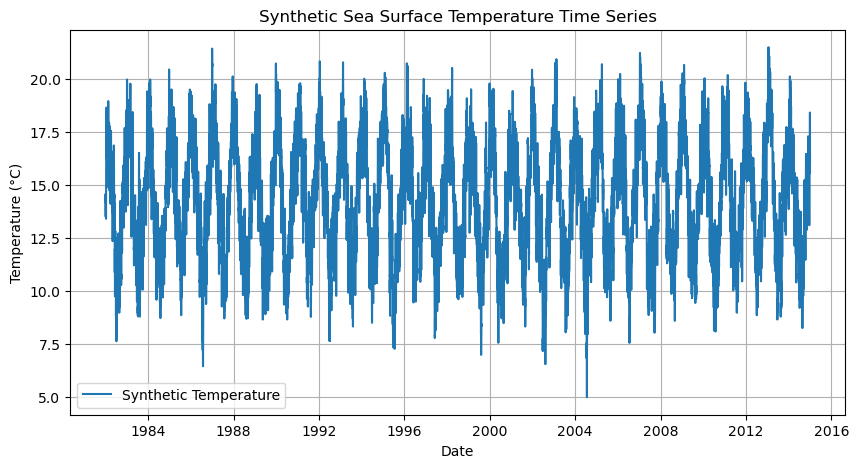

In [52]:
# Generate random temperature date in the period
t, temp = generate_random_t_temp('1982-01-01', '2014-12-31')

plot_trend(t, temp)

In [53]:
# Initial a class
mhw_calculator = MarineHeatWaveCalculator(t, temp)

In [54]:
# Calculate the mhw
mhw, clim = mhw_calculator.calculate_mhw()

Time start: 1982-01-01, time end: 2014-12-31
All params: {'climatologyPeriod': [None, None], 'pctile': 90, 'windowHalfWidth': 5, 'smoothPercentile': True, 'smoothPercentileWidth': 31, 'minDuration': 5, 'joinAcrossGaps': True, 'maxGap': 2, 'maxPadLength': False, 'coldSpells': False, 'alternateClimatology': False, 'Ly': False} 

The number of mhw event is 58


In [55]:
t

array([723546, 723547, 723548, ..., 735596, 735597, 735598])

In [56]:
# A easy date input method also works
mhw_calculator = MarineHeatWaveCalculator(['1982-01-01', '2014-12-31'], temp)
mhw, clim = mhw_calculator.calculate_mhw()


Time start: 1982-01-01, time end: 2014-12-31
All params: {'climatologyPeriod': [None, None], 'pctile': 90, 'windowHalfWidth': 5, 'smoothPercentile': True, 'smoothPercentileWidth': 31, 'minDuration': 5, 'joinAcrossGaps': True, 'maxGap': 2, 'maxPadLength': False, 'coldSpells': False, 'alternateClimatology': False, 'Ly': False} 

The number of mhw event is 58


In [57]:
# If the length of date input doesn't match with the temp, there will be an error
mhw_calculator = MarineHeatWaveCalculator(['1982-01-03', '2014-12-31'], temp)
mhw, clim = mhw_calculator.calculate_mhw()


Exception: The length of the day and the length of temperature are different.

In [58]:
# If the end date is earlier than the start date, there will be an error

mhw_calculator = MarineHeatWaveCalculator(['2014-01-01', '1982-12-31'], temp)
mhw, clim = mhw_calculator.calculate_mhw()

Exception: The end date must later than the start date.

In [60]:
# Update parameters and calculate mhw using the new params
changed_params = {
    'climatologyPeriod': [2010, 2013],
    'pctile': 99,
    'windowHalfWidth': 15
}
mhw_calculator.update_params(changed_params)
mhw, clim = mhw_calculator.calculate_mhw()


Time start: 1982-01-01, time end: 2014-12-31
All params: {'climatologyPeriod': [2010, 2013], 'pctile': 99, 'windowHalfWidth': 15, 'smoothPercentile': True, 'smoothPercentileWidth': 31, 'minDuration': 5, 'joinAcrossGaps': True, 'maxGap': 2, 'maxPadLength': False, 'coldSpells': False, 'alternateClimatology': False, 'Ly': False} 

The number of mhw event is 6


In [61]:
# Update the date and temperature
new_t, new_temp = generate_random_t_temp('2015-01-01', '2016-12-31')
mhw_calculator.update_date(new_t, new_temp)
mhw, clim = mhw_calculator.calculate_mhw()


Time start: 1982-01-01, time end: 2016-12-31
All params: {'climatologyPeriod': [2010, 2013], 'pctile': 99, 'windowHalfWidth': 15, 'smoothPercentile': True, 'smoothPercentileWidth': 31, 'minDuration': 5, 'joinAcrossGaps': True, 'maxGap': 2, 'maxPadLength': False, 'coldSpells': False, 'alternateClimatology': False, 'Ly': False} 

The number of mhw event is 6


In [62]:

# Update the date and temperature
new_t, new_temp = generate_random_t_temp('2017-01-05', '2018-12-31')
mhw_calculator.update_date(new_t, new_temp)


Exception: The new date should start from 2017-01-01 when maxAllowedGap is 0.

In [63]:
# Allow a max gap when update the date and temp
mhw_calculator.update_date(new_t, new_temp, maxAllowedGap=4)
# Calculate mhw using updated date
mhw_result, clim = mhw_calculator.calculate_mhw()


Time start: 1982-01-01, time end: 2018-12-31
All params: {'climatologyPeriod': [2010, 2013], 'pctile': 99, 'windowHalfWidth': 15, 'smoothPercentile': True, 'smoothPercentileWidth': 31, 'minDuration': 5, 'joinAcrossGaps': True, 'maxGap': 2, 'maxPadLength': False, 'coldSpells': False, 'alternateClimatology': False, 'Ly': False} 

The number of mhw event is 6
